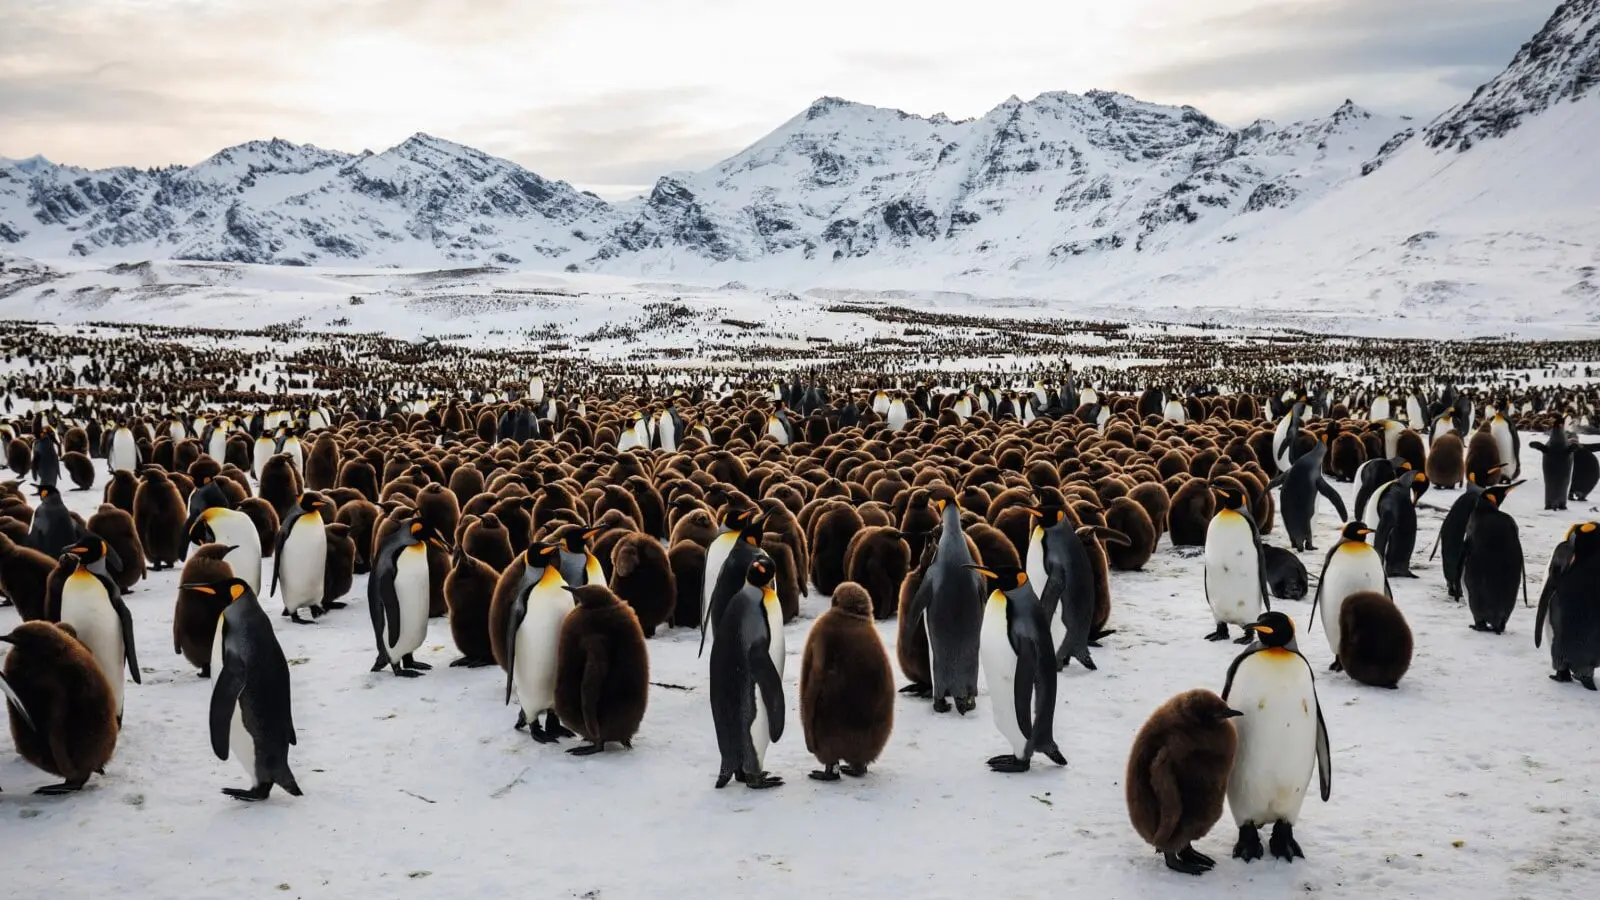

# Capstone Project: Penguins

Data analysis and machine learning with Python!

Wraps up Udemy course from Jose Portilla: Python for Data Science and Machine Learning Bootcamp

**March 4-7, 2023**

Garrett Becker

____
____
## Part 5: Principal Component Analysis
____
____

____
## Imports and Setup
____

** Import modules **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

** Import data **

In [2]:
df = pd.read_csv('penguins.csv')

In [3]:
df.head()

Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
0           1  Adelie  Torgersen            39.1           18.7   
1           2  Adelie  Torgersen            39.5           17.4   
2           3  Adelie  Torgersen            40.3           18.0   
3           4  Adelie  Torgersen             NaN            NaN   
4           5  Adelie  Torgersen            36.7           19.3   

   flipper_length_mm  body_mass_g     sex  year  
0              181.0       3750.0    male  2007  
1              186.0       3800.0  female  2007  
2              195.0       3250.0  female  2007  
3                NaN          NaN     NaN  2007  
4              193.0       3450.0  female  2007

** Fix NaN values **

In [4]:
df[df.isna().any(axis=1)]

Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
3             4  Adelie  Torgersen             NaN            NaN   
8             9  Adelie  Torgersen            34.1           18.1   
9            10  Adelie  Torgersen            42.0           20.2   
10           11  Adelie  Torgersen            37.8           17.1   
11           12  Adelie  Torgersen            37.8           17.3   
47           48  Adelie      Dream            37.5           18.9   
178         179  Gentoo     Biscoe            44.5           14.3   
218         219  Gentoo     Biscoe            46.2           14.4   
256         257  Gentoo     Biscoe            47.3           13.8   
268         269  Gentoo     Biscoe            44.5           15.7   
271         272  Gentoo     Biscoe             NaN            NaN   

     flipper_length_mm  body_mass_g  sex  year  
3                  NaN          NaN  NaN  2007  
8                193.0       3475.0  NaN  2007  
9                190.0       4250.0  NaN  2007  
10               186.0       3300.0  NaN  2007  
11               180.0       3700.0  NaN  2007  
47               179.0       2975.0  NaN  2007  
178              216.0       4100.0  NaN  2007  
218              214.0       4650.0  NaN  2008  
256              216.0       4725.0  NaN  2009  
268              217.0       4875.0  NaN  2009  
271                NaN          NaN  NaN  2009

** Fill in the average of numerical columns for NaN **

In [5]:
df['bill_length_mm'].fillna(value=df['bill_length_mm'].mean(), inplace=True)
df['bill_depth_mm'].fillna(value=df['bill_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(value=df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(value=df['body_mass_g'].mean(), inplace=True)

In [6]:
df[df.isna().any(axis=1)]

Unnamed: 0 species     island  bill_length_mm  bill_depth_mm  \
3             4  Adelie  Torgersen        43.92193       17.15117   
8             9  Adelie  Torgersen        34.10000       18.10000   
9            10  Adelie  Torgersen        42.00000       20.20000   
10           11  Adelie  Torgersen        37.80000       17.10000   
11           12  Adelie  Torgersen        37.80000       17.30000   
47           48  Adelie      Dream        37.50000       18.90000   
178         179  Gentoo     Biscoe        44.50000       14.30000   
218         219  Gentoo     Biscoe        46.20000       14.40000   
256         257  Gentoo     Biscoe        47.30000       13.80000   
268         269  Gentoo     Biscoe        44.50000       15.70000   
271         272  Gentoo     Biscoe        43.92193       17.15117   

     flipper_length_mm  body_mass_g  sex  year  
3           200.915205  4201.754386  NaN  2007  
8           193.000000  3475.000000  NaN  2007  
9           190.000000  4250.000000  NaN  2007  
10          186.000000  3300.000000  NaN  2007  
11          180.000000  3700.000000  NaN  2007  
47          179.000000  2975.000000  NaN  2007  
178         216.000000  4100.000000  NaN  2007  
218         214.000000  4650.000000  NaN  2008  
256         216.000000  4725.000000  NaN  2009  
268         217.000000  4875.000000  NaN  2009  
271         200.915205  4201.754386  NaN  2009

** Remove rows with NaN for sex, and make sure no NaN values are left **

In [7]:
df = df[df['sex'].notna()]

In [8]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [Unnamed: 0, species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, year]
Index: []

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB


In [10]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
4       3450.0  female  2007  
5       3650.0    male  2007

** Make dummy variables for species, island, and sex -- goal is to predit the body mass! **

In [12]:
species_labels = ['species']
df = pd.get_dummies(df, columns=species_labels, drop_first=False)

In [13]:
island_labels = ['island']
df = pd.get_dummies(df, columns=island_labels, drop_first=False)

In [14]:
sex_labels = ['sex']
df = pd.get_dummies(df, columns=sex_labels, drop_first=False)

In [15]:
df

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
0              39.1           18.7              181.0       3750.0  2007   
1              39.5           17.4              186.0       3800.0  2007   
2              40.3           18.0              195.0       3250.0  2007   
4              36.7           19.3              193.0       3450.0  2007   
5              39.3           20.6              190.0       3650.0  2007   
..              ...            ...                ...          ...   ...   
339            55.8           19.8              207.0       4000.0  2009   
340            43.5           18.1              202.0       3400.0  2009   
341            49.6           18.2              193.0       3775.0  2009   
342            50.8           19.0              210.0       4100.0  2009   
343            50.2           18.7              198.0       3775.0  2009   

     species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0                 1                  0               0              0   
1                 1                  0               0              0   
2                 1                  0               0              0   
4                 1                  0               0              0   
5                 1                  0               0              0   
..              ...                ...             ...            ...   
339               0                  1               0              0   
340               0                  1               0              0   
341               0                  1               0              0   
342               0                  1               0              0   
343               0                  1               0              0   

     island_Dream  island_Torgersen  sex_female  sex_male  
0               0                 1           0         1  
1               0                 1           1         0  
2               0                 1           1         0  
4               0                 1           1         0  
5               0                 1           0         1  
..            ...               ...         ...       ...  
339             1                 0           0         1  
340             1                 0           1         0  
341             1                 0           0         1  
342             1                 0           0         1  
343             1                 0           1         0  

[333 rows x 13 columns]

____
## Principal Component Analysis
____

In [16]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [17]:
scaled_data = scaler.transform(df)

In [18]:
scaled_data

array([[-0.89604189,  0.7807321 , -1.42675157, ...,  2.46680084,
        -0.99103121,  0.99103121],
       [-0.82278787,  0.11958397, -1.06947358, ...,  2.46680084,
         1.00904996, -1.00904996],
       [-0.67627982,  0.42472926, -0.42637319, ...,  2.46680084,
         1.00904996, -1.00904996],
       ...,
       [ 1.02687621,  0.52644436, -0.56928439, ..., -0.40538335,
        -0.99103121,  0.99103121],
       [ 1.24663828,  0.93330475,  0.64546078, ..., -0.40538335,
        -0.99103121,  0.99103121],
       [ 1.13675725,  0.7807321 , -0.2120064 , ..., -0.40538335,
         1.00904996, -1.00904996]])

** PCA Object **

In [19]:
pca = PCA(n_components=2)

In [20]:
pca.fit(scaled_data)

PCA(n_components=2)

** Transform data into two principal components **

In [21]:
x_pca = pca.transform(scaled_data)

In [22]:
scaled_data.shape

(333, 13)

In [23]:
x_pca.shape

(333, 2)

Text(0, 0.5, 'Second Principal Component')

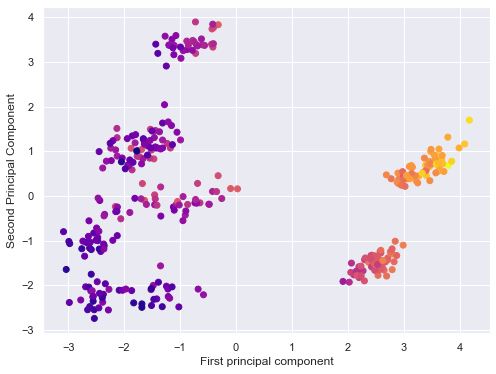

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['body_mass_g'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

** Interpreting **

In [26]:
pca.components_

array([[ 0.27589964, -0.31744024,  0.40348094,  0.39124721,  0.03213251,
        -0.31023435, -0.11609997,  0.41888588,  0.34929171, -0.24147932,
        -0.16676222, -0.08028328,  0.08028328],
       [ 0.38947359,  0.26665631,  0.07751914,  0.09304759, -0.02177797,
        -0.24007697,  0.42655397, -0.11023468, -0.21677981,  0.35462732,
        -0.18034235, -0.3905439 ,  0.3905439 ]])

In [29]:
df_comp = pd.DataFrame(pca.components_, columns=df.keys())

<AxesSubplot:>

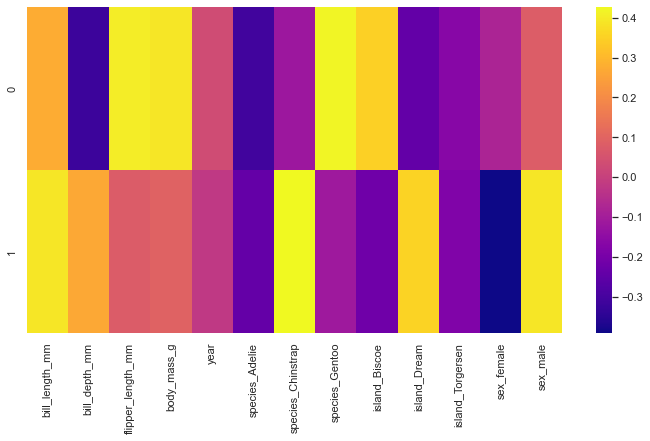

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma',)

In [31]:
df_comp.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g      year  \
0        0.275900      -0.317440           0.403481     0.391247  0.032133   
1        0.389474       0.266656           0.077519     0.093048 -0.021778   

   species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0       -0.310234          -0.116100        0.418886       0.349292   
1       -0.240077           0.426554       -0.110235      -0.216780   

   island_Dream  island_Torgersen  sex_female  sex_male  
0     -0.241479         -0.166762   -0.080283  0.080283  
1      0.354627         -0.180342   -0.390544  0.390544